## Graph Embeddings
Mathematically, a graph is a structure that captures a set of objects and the relations between them. This representation has had a remarkable versatility in the abstraction of a wide variety of scientific and business problems. Road, networks, water pipeline networks, traffic networks, oil/chemical networks, supply-chains, computer networks, recommender systems in electronic market places are all examples of graphs. Since graph structured data are pervasive, problems on graphs have been researched for a long time now. These solutions are exploited to provide very useful applications in many domains. Finding best delivery routes, identifying influential writers in content networks, detecting fraud in financial transactions are all examples. Many of these features are available as part of the ArangoDB analytics eco-system. With the current explosion of interest machine learning, there is a surge in interest in developing machine learning applications on graphs. In this post we will discuss one approach to performing machine learning on graphs. The material for this post comes from [this paper](https://www-cs.stanford.edu/people/jure/pubs/graphrepresentation-ieee17.pdf) and [these slides/notes](http://snap.stanford.edu/proj/embeddings-www/files/nrltutorial-part2-gnns.pdf).
The key idea is to convert the data which has a representation as a graph to a representation commonly used machine learning. This representation is called the Euclidean representation. The crucial idea with this representation is that the notion of distance between two nodes exist. Nodes in the graph are transformed into points in a Euclidean representation. 
A basic template to learn this Euclidean representation is:
1. Define the set of nodes which we deem to be similar. This is the notion of neighborhood of the node.
2. Posit that nodes that are similar in the graph are similar in the Euclidean representation. In otherwords, the similarity in the set of nodes (ie., neighborhood) is preserved as go from the graph to Euclidean representation.
3. Develop a neural network in which the set of nodes that are similar in the graph are provided as the input to the network and Euclidean representation is what is learned. The neural network represents an _encoder_ that uses a _similarity_ measure to determine a Euclidean representation. The parameters of the network are learned so that similarity in the graph representation is preserved in the Euclidean representation.

As discussed in [the slides/notes](http://snap.stanford.edu/proj/embeddings-www/files/nrltutorial-part2-gnns.pdf), we can consider the following as the set of nodes for which similarity in the graph is evaluated:
1. Nodes that are adjacent to a node
2. Nodes that are reachable by $k$ hops from the node.
3. Nodes that manifest in a random walk of a specified length starting at the node.

Each of these strategies have strengths and weakness and are particularly suited to certain applications as discussed in [goyal and ferrera, 2017](https://usc-isi-i2.github.io/papers/goyal18-knosys.pdf). The third approach is what we will discuss in this post. This approach of capturing the neighborhood of the ndoe is called a _random-walk_. The Euclidean representation of the nodes obtained from the neural network are called _embeddings_. To obtain these embeddings, random walks of particular lengths are initiated from each node of the graph. The nodes visited by the walk are captured sequentially until a walk of the desired length is completed. The generated walks are fed as input to the neural network and the parameters of the neural network are learned as part of training the network. As a result of training, we obtain the Euclidean representation of the nodes of the graph. These node representations can be used to peform machine learning tasks such as _node_ _classification_ and _link_ _prediction_. A schematic of using _random walks_ to obtain graph embeddings is 






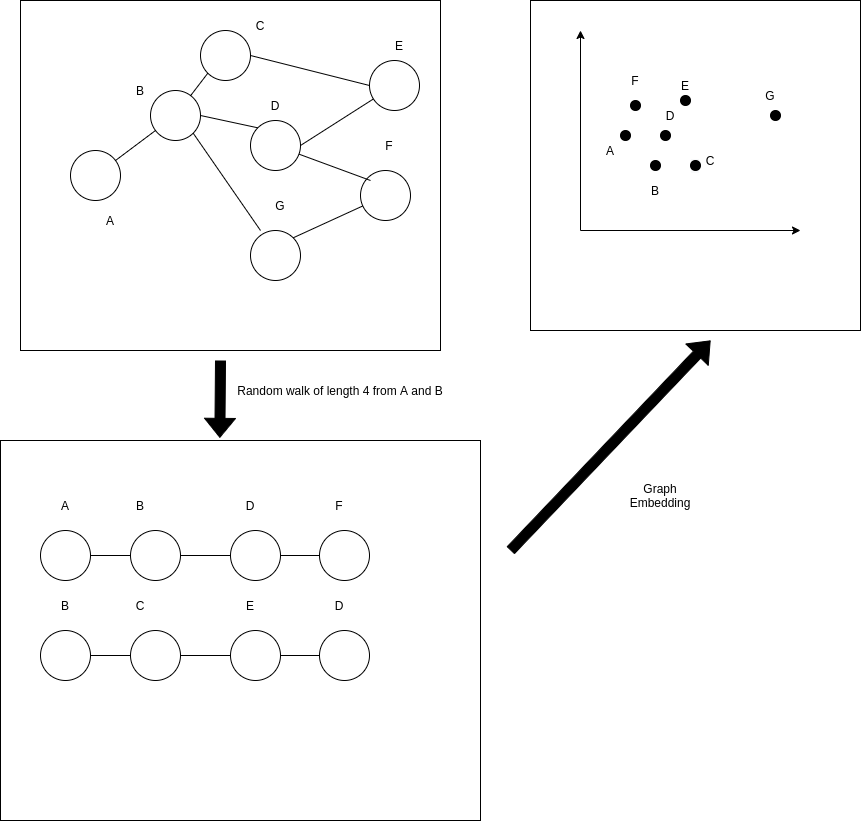

In [1]:
from IPython.display import Image
Image('embedding_schematic.png')

Instead of just using a simple _encoder_ and _similarity_ measure to determine a Euclidean representation, it is possible to use more sophisticated approach to determining a representation for the graph. The approach using just an _encoder_ function and a _similarity_ metric is an example of a _shallow_ approach to learning an embedding. In contrast, we can use a _deeper_ approach using _Graph Neural Networks (GNN)_. In a _GNN_ nodes aggregate information from their neighbors using a _neural network_ 


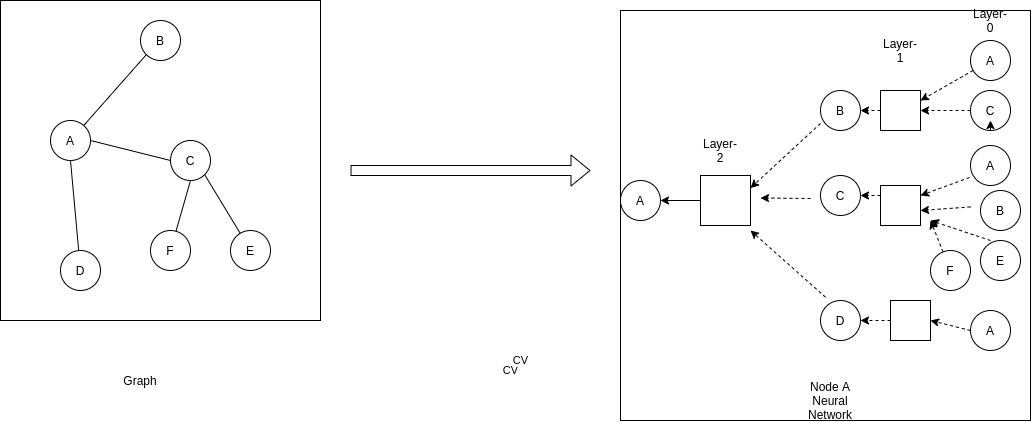

In [2]:
from IPython.display import Image
Image('gnn_schematic.png')